## Machine Learning for Time Series Data in Python

### CHAPTER 1. Time Series and Machine Learning Primer

#### 1.1 Timeseries kinds and applications

* Time series means data that change over time
* It consists of two things:
    1. An array of numbers that represent data itself
    2. Another array that contains a timestamp for each datapoint
* Use 'plot' method to plot a pandas timeseries data

Why machine learning?
* We can use really big and complicated data and learn the patterns
* We can predict the future

Machine learning and timeseries data pipeline
* Feature extraction
* Model fitting
* Prediction and validation

   data_values
0   214.009998
1   214.379993
2   210.969995
3   210.580000
4   211.980005
   data_values
0    -0.006970
1    -0.007953
2    -0.008903
3    -0.009798
4    -0.010617


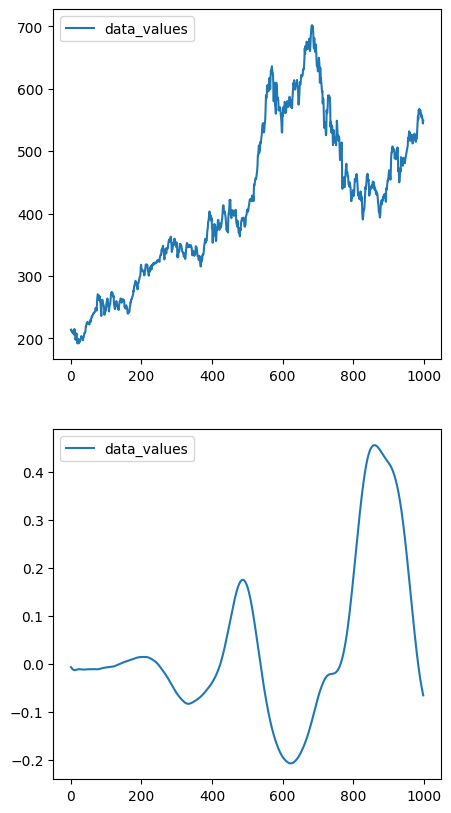

In [12]:
# plotting time series (PART I)
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# get data
prices = pd.read_csv('9_datasets/prices.csv')
data1 = prices[prices['symbol']=='AAPL']['close'].reset_index()
data1 = data1.drop('index', axis=1)
data1.columns=['data_values']

data2 = [-0.006969843525439501, -0.007952902466058731, -0.008903459645807743, -0.009798352606594563, -0.010616515763103962, -0.011340003460645676, -0.011954753659665585, -0.012451224029064178, -0.01282479427754879, -0.013075812719762325, -0.013209492899477482, -0.013235514983534813, -0.013167372904717922, -0.013021581806242466, -0.012816701084375381, -0.012572313658893108, -0.012307990342378616, -0.012042277492582798, -0.011791798286139965, -0.011570518836379051, -0.01138916052877903, -0.011254891753196716, -0.011171218939125538, -0.011138049885630608, -0.011152053251862526, -0.011207137256860733, -0.011295061558485031, -0.011406184174120426, -0.0115301962941885, -0.011656871065497398, -0.011776749975979328, -0.011881713755428791, -0.011965455487370491, -0.012023726478219032, -0.012054483406245708, -0.012057826854288578, -0.012035825289785862, -0.011992150917649269, -0.011931713670492172, -0.011860133148729801, -0.011783263646066189, -0.011706703342497349, -0.011635394766926765, -0.0115732466802001, -0.01152291614562273, -0.011485704220831394, -0.011461532674729824, -0.011449089273810387, -0.011446037329733372, -0.011449296958744526, -0.011455396190285683, -0.011460858397185802, -0.011462492868304253, -0.011457755230367184, -0.011444938369095325, -0.011423380114138126, -0.011393466964364052, -0.01135662104934454, -0.011315174400806427, -0.011272117495536804, -0.011230852454900742, -0.011194849386811256, -0.011167343705892563, -0.011150991544127464, -0.01114762481302023, -0.011158009991049767, -0.011181741021573544, -0.011217181570827961, -0.011261539533734322, -0.011310956440865993, -0.011360818520188332, -0.011405935510993004, -0.011440948583185673, -0.011460607871413231, -0.011460174806416035, -0.01143566519021988, -0.011384151875972748, -0.011303910054266453, -0.01119453739374876, -0.011056967079639435, -0.01089339517056942, -0.010707118548452854, -0.010502327233552933, -0.010283825919032097, -0.010056761093437672, -0.00982631091028452, -0.009597375988960266, -0.009374359622597694, -0.009160934016108513, -0.008959902450442314, -0.00877312757074833, -0.008601504378020763, -0.008445044979453087, -0.0083029605448246, -0.008173861540853977, -0.00805590022355318, -0.007947034202516079, -0.007845147512853146, -0.007748290430754423, -0.007654791697859764, -0.007563380058854818, -0.007473208010196686, -0.007383852265775204, -0.00729528209194541, -0.007207769900560379, -0.007121773436665535, -0.007037781178951263, -0.006956190336495638, -0.0068771555088460445, -0.006800487171858549, -0.006725572515279055, -0.006651308387517929, -0.006576104089617729, -0.0064979433082044125, -0.006414448376744986, -0.006323016714304686, -0.006220942363142967, -0.006105579435825348, -0.005974496249109507, -0.005825623869895935, -0.005657388363033533, -0.005468782503157854, -0.005259419791400433, -0.005029582884162664, -0.004780169110745192, -0.004512649495154619, -0.004228961654007435, -0.003931396175175905, -0.0036224524956196547, -0.0033047122415155172, -0.0029807088430970907, -0.002652780618518591, -0.002322975778952241, -0.001993001438677311, -0.001664179959334433, -0.001337438472546637, -0.001013335888274014, -0.0006921053281985223, -0.0003737312799785286, -5.8022378652822226e-05, 0.0002552849764470011, 0.000566476141102612, 0.0008757892064750195, 0.001183335785754025, 0.0014890804886817932, 0.001792827737517655, 0.002094237133860588, 0.0023928529117256403, 0.0026881499215960503, 0.002979591256007552, 0.003266678424552083, 0.003549037268385291, 0.0038264680188149214, 0.004098967649042606, 0.004366748966276646, 0.004630249459296465, 0.00489012198522687, 0.005147179588675499, 0.005402369890362024, 0.005656684283167124, 0.0059111095033586025, 0.006166553590446711, 0.006423812359571457, 0.0066834911704063416, 0.006945970002561808, 0.007211401127278805, 0.007479694671928883, 0.007750542834401131, 0.008023466914892197, 0.008297836408019066, 0.008572916500270367, 0.008847975172102451, 0.009122285060584545, 0.009395158849656582, 0.009666016325354576, 0.009934359230101109, 0.010199790820479393, 0.010461990721523762, 0.010720670223236084, 0.010975554585456848, 0.011226308532059193, 0.01147251483052969, 0.011713636107742786, 0.011948961764574051, 0.012177614495158195, 0.012398538179695606, 0.012610545381903648, 0.01281234435737133, 0.013002607971429825, 0.013180055655539036, 0.01334353443235159, 0.013492103666067123, 0.013625119812786579, 0.01374230906367302, 0.013843807391822338, 0.013930161483585835, 0.014002339914441109, 0.014061697758734226, 0.014109878800809383, 0.014148742891848087, 0.014180217869579792, 0.014206183142960072, 0.014228325337171555, 0.01424799207597971, 0.014266063459217548, 0.014282852411270142, 0.014298034831881523, 0.014310626313090324, 0.014318974688649178, 0.014320817776024342, 0.01431338395923376, 0.014293509535491467, 0.01425783522427082, 0.014202912338078022, 0.0141254598274827, 0.014022517018020153, 0.013891603797674179, 0.01373087614774704, 0.013539212755858898, 0.013316301628947258, 0.01306260097771883, 0.012779347598552704, 0.01246845442801714, 0.012132375501096249, 0.011773919686675072, 0.011396101675927639, 0.01100190356373787, 0.010594101622700691, 0.01017504371702671, 0.009746525436639786, 0.009309633634984493, 0.008864672854542732, 0.008411169983446598, 0.007947842590510845, 0.007472694385796785, 0.0069831437431275845, 0.0064761703833937645, 0.005948488134890795, 0.005396760534495115, 0.004817801062017679, 0.004208757542073727, 0.0035672998055815697, 0.0028917482122778893, 0.0021811758633702993, 0.0014354658778756857, 0.0006553070270456374, -0.00015784215065650642, -0.0010018463945016265, -0.0018740162486210465, -0.0027712644077837467, -0.003690282814204693, -0.0046277130022645, -0.0055803293362259865, -0.0065451995469629765, -0.007519813254475594, -0.008502190001308918, -0.009490938857197762, -0.010485285893082619, -0.011485062539577484, -0.012490631081163883, -0.013502828776836395, -0.014522832818329334, -0.015552057884633541, -0.0165919940918684, -0.017644120380282402, -0.018709750846028328, -0.019789952784776688, -0.020885499194264412, -0.021996784955263138, -0.02312386780977249, -0.02426641806960106, -0.025423860177397728, -0.026595309376716614, -0.02777978964149952, -0.028976233676075935, -0.030183574184775352, -0.03140084818005562, -0.032627228647470474, -0.033862072974443436, -0.03510497882962227, -0.03635562211275101, -0.03761390969157219, -0.03887977451086044, -0.04015316814184189, -0.041433919221162796, -0.0427217036485672, -0.044015832245349884, -0.04531529173254967, -0.04661860689520836, -0.047923874109983444, -0.04922868311405182, -0.05053018033504486, -0.051825109869241714, -0.0531100369989872, -0.05438120290637016, -0.05563488230109215, -0.056867506355047226, -0.05807573348283768, -0.05925658717751503, -0.060407742857933044, -0.06152743473649025, -0.06261463463306427, -0.06366916000843048, -0.06469137221574783, -0.06568249315023422, -0.06664425879716873, -0.06757901608943939, -0.0684892013669014, -0.06937756389379501, -0.07024683803319931, -0.07109934091567993, -0.0719371810555458, -0.07276184856891632, -0.07357412576675415, -0.07437396049499512, -0.07516057044267654, -0.0759323462843895, -0.07668673247098923, -0.07742071151733398, -0.07813037931919098, -0.07881157100200653, -0.0794597715139389, -0.08007032424211502, -0.08063872903585434, -0.08116075396537781, -0.08163250237703323, -0.08205077797174454, -0.08241289854049683, -0.08271712809801102, -0.08296241611242294, -0.08314850181341171, -0.08327591419219971, -0.08334612846374512, -0.08336102962493896, -0.08332307636737823, -0.08323535323143005, -0.08310102671384811, -0.08292367309331894, -0.08270672708749771, -0.08245393633842468, -0.08216861635446548, -0.0818541944026947, -0.08151374012231827, -0.08115013688802719, -0.08076605945825577, -0.08036381006240845, -0.0799456536769867, -0.07951334863901138, -0.07906867563724518, -0.07861322164535522, -0.07814817130565643, -0.07767457515001297, -0.07719365507364273, -0.07670603692531586, -0.0762123242020607, -0.07571301609277725, -0.0752081573009491, -0.07469765841960907, -0.07418119162321091, -0.07365802675485611, -0.07312728464603424, -0.0725877434015274, -0.07203804701566696, -0.07147658616304398, -0.07090158760547638, -0.07031130790710449, -0.06970391422510147, -0.06907770037651062, -0.06843104213476181, -0.06776271015405655, -0.0670715719461441, -0.0663570687174797, -0.06561893224716187, -0.06485734134912491, -0.06407298892736435, -0.06326692551374435, -0.06244063004851341, -0.06159583851695061, -0.06073455512523651, -0.05985897779464722, -0.05897130072116852, -0.05807364732027054, -0.05716809630393982, -0.05625639855861664, -0.05533996596932411, -0.05441979691386223, -0.053496409207582474, -0.05256979912519455, -0.051639385521411896, -0.05070418864488602, -0.04976261407136917, -0.04881269857287407, -0.047852154821157455, -0.04687836393713951, -0.04588853940367699, -0.044879794120788574, -0.043849244713783264, -0.04279410094022751, -0.041711702942848206, -0.04059965908527374, -0.03945586457848549, -0.03827839717268944, -0.03706580400466919, -0.03581683337688446, -0.034530527889728546, -0.03320617228746414, -0.03184308111667633, -0.030440744012594223, -0.028998618945479393, -0.02751609869301319, -0.02599235624074936, -0.024426385760307312, -0.022816931828856468, -0.021162424236536026, -0.019460922107100487, -0.01771015301346779, -0.01590757817029953, -0.014050310477614403, -0.01213528960943222, -0.010159285739064217, -0.008118986152112484, -0.006011120043694973, -0.0038326045032590628, -0.0015805383445695043, 0.000747643003705889, 0.0031540850177407265, 0.0056404476054012775, 0.008207831531763077, 0.010856736451387405, 0.013587037101387978, 0.016397980973124504, 0.019288184121251106, 0.02225562371313572, 0.02529769577085972, 0.028411362320184708, 0.031593065708875656, 0.03483891487121582, 0.03814474120736122, 0.04150610789656639, 0.044918518513441086, 0.04837728664278984, 0.05187787115573883, 0.05541561543941498, 0.058985963463783264, 0.06258455663919449, 0.06620699912309647, 0.06984919309616089, 0.07350697368383408, 0.07717640697956085, 0.08085354417562485, 0.08453439921140671, 0.08821514248847961, 0.09189169108867645, 0.09555979818105698, 0.09921526163816452, 0.10285355150699615, 0.10646987706422806, 0.11005926132202148, 0.1136162206530571, 0.11713528633117676, 0.12061043083667755, 0.12403544783592224, 0.1274038553237915, 0.1307087391614914, 0.1339433342218399, 0.13710051774978638, 0.1401730626821518, 0.1431540697813034, 0.14603619277477264, 0.1488126814365387, 0.15147684514522552, 0.15402238070964813, 0.15644314885139465, 0.15873372554779053, 0.1608888804912567, 0.16290384531021118, 0.16477492451667786, 0.16649803519248962, 0.16807040572166443, 0.1694892942905426, 0.1707523763179779, 0.17185774445533752, 0.17280395328998566, 0.17358961701393127, 0.17421336472034454, 0.17467424273490906, 0.1749710738658905, 0.1751028448343277, 0.1750684380531311, 0.17486673593521118, 0.1744963824748993, 0.17395634949207306, 0.17324523627758026, 0.17236198484897614, 0.17130543291568756, 0.17007480561733246, 0.1686692237854004, 0.16708862781524658, 0.16533292829990387, 0.16340264678001404, 0.1612987518310547, 0.15902268886566162, 0.15657630562782288, 0.15396235883235931, 0.15118364989757538, 0.1482437252998352, 0.14514636993408203, 0.14189566671848297, 0.13849623501300812, 0.13495275378227234, 0.13127009570598602, 0.12745319306850433, 0.12350741028785706, 0.11943776905536652, 0.11524970829486847, 0.1109485775232315, 0.10653993487358093, 0.10202929377555847, 0.09742264449596405, 0.0927259624004364, 0.08794556558132172, 0.08308792114257812, 0.07816005498170853, 0.07316907495260239, 0.06812231242656708, 0.06302756071090698, 0.05789267644286156, 0.052725620567798615, 0.04753440245985985, 0.042326997965574265, 0.03711116313934326, 0.03189440816640854, 0.02668387070298195, 0.02148626558482647, 0.016307726502418518, 0.011153830215334892, 0.006029551383107901, 0.0009392463252879679, -0.004113342612981796, -0.00912502035498619, -0.014093099161982536, -0.019015314057469368, -0.023889727890491486, -0.028714654967188835, -0.03348856046795845, -0.038209978491067886, -0.042877454310655594, -0.047489456832408905, -0.052044373005628586, -0.056540410965681076, -0.06097571924328804, -0.06534827500581741, -0.06965593993663788, -0.0738966166973114, -0.07806801050901413, -0.08216818422079086, -0.08619511127471924, -0.09014693647623062, -0.09402209520339966, -0.0978192687034607, -0.10153736174106598, -0.1051756739616394, -0.10873371362686157, -0.11221137642860413, -0.11560867726802826, -0.11892612278461456, -0.12216430902481079, -0.1253240406513214, -0.12840652465820312, -0.13141269981861115, -0.134344220161438, -0.13720236718654633, -0.1399887204170227, -0.1427050232887268, -0.1453530341386795, -0.1479344367980957, -0.15045106410980225, -0.15290477871894836, -0.1552973836660385, -0.1576305329799652, -0.15990592539310455, -0.16212491691112518, -0.164288729429245, -0.16639845073223114, -0.16845472157001495, -0.1704578548669815, -0.17240801453590393, -0.1743048131465912, -0.17614780366420746, -0.17793604731559753, -0.17966866493225098, -0.18134449422359467, -0.18296247720718384, -0.18452133238315582, -0.18602026998996735, -0.18745875358581543, -0.18883638083934784, -0.1901533156633377, -0.19141043722629547, -0.1926087886095047, -0.1937500387430191, -0.19483642280101776, -0.19587016105651855, -0.19685405492782593, -0.1977909356355667, -0.19868355989456177, -0.19953449070453644, -0.2003459632396698, -0.20111988484859467, -0.201857328414917, -0.202558696269989, -0.2032240927219391, -0.20385216176509857, -0.2044413983821869, -0.20498934388160706, -0.20549322664737701, -0.2059497982263565, -0.20635555684566498, -0.20670723915100098, -0.20700129866600037, -0.20723502337932587, -0.2074059396982193, -0.20751219987869263, -0.20755255222320557, -0.20752672851085663, -0.20743504166603088, -0.2072785198688507, -0.20705869793891907, -0.20677778124809265, -0.20643815398216248, -0.20604240894317627, -0.20559312403202057, -0.20509257912635803, -0.20454297959804535, -0.2039456069469452, -0.20330190658569336, -0.20261240005493164, -0.2018771767616272, -0.201095849275589, -0.20026767253875732, -0.19939182698726654, -0.19846712052822113, -0.1974923312664032, -0.19646690785884857, -0.19538986682891846, -0.19426117837429047, -0.1930811107158661, -0.19185037910938263, -0.19057025015354156, -0.1892424374818802, -0.18786895275115967, -0.18645215034484863, -0.18499422073364258, -0.1834973841905594, -0.18196389079093933, -0.18039512634277344, -0.17879250645637512, -0.17715641856193542, -0.17548708617687225, -0.17378370463848114, -0.17204499244689941, -0.17026935517787933, -0.16845472157001495, -0.16659824550151825, -0.16469769179821014, -0.1627504676580429, -0.16075442731380463, -0.15870755910873413, -0.1566086709499359, -0.15445682406425476, -0.15225185453891754, -0.14999431371688843, -0.14768515527248383, -0.1453259140253067, -0.1429188847541809, -0.14046619832515717, -0.1379704475402832, -0.1354343593120575, -0.13286051154136658, -0.13025127351284027, -0.12760937213897705, -0.12493647634983063, -0.12223482877016068, -0.11950605362653732, -0.11675196141004562, -0.1139741986989975, -0.11117482930421829, -0.10835609585046768, -0.10552054643630981, -0.10267144441604614, -0.0998125821352005, -0.09694837033748627, -0.094083771109581, -0.09122445434331894, -0.08837645500898361, -0.08554624021053314, -0.08274051547050476, -0.07996580749750137, -0.0772286206483841, -0.07453489303588867, -0.07189017534255981, -0.06929906457662582, -0.06676535308361053, -0.06429200619459152, -0.06188094988465309, -0.059533290565013885, -0.05724930018186569, -0.055028654634952545, -0.052870530635118484, -0.050773926079273224, -0.048737846314907074, -0.04676143079996109, -0.04484422877430916, -0.04298641160130501, -0.041188795119524, -0.03945304825901985, -0.03778156638145447, -0.036177415400743484, -0.03464436158537865, -0.03318655118346214, -0.031808339059352875, -0.030514108017086983, -0.029307860881090164, -0.02819303795695305, -0.027172328904271126, -0.026247290894389153, -0.0254183541983366, -0.024684539064764977, -0.024043472483754158, -0.02349139004945755, -0.02302313968539238, -0.022632364183664322, -0.022311540320515633, -0.022052329033613205, -0.02184569649398327, -0.021682213991880417, -0.02155221626162529, -0.021446112543344498, -0.021354496479034424, -0.02126832865178585, -0.021179040893912315, -0.021078629419207573, -0.020959557965397835, -0.02081487514078617, -0.02063809521496296, -0.020423119887709618, -0.020164109766483307, -0.019855443388223648, -0.01949159801006317, -0.01906699128448963, -0.01857605203986168, -0.01801304519176483, -0.017372144386172295, -0.016647422686219215, -0.01583292707800865, -0.014922693371772766, -0.013910908252000809, -0.012791940942406654, -0.011560442857444286, -0.010211430490016937, -0.008740379475057125, -0.0071431854739785194, -0.00541623355820775, -0.003556350013241172, -0.0015607619425281882, 0.0005729723488911986, 0.0028470722027122974, 0.005263622850179672, 0.007824704982340336, 0.010532482527196407, 0.013389293104410172, 0.01639772765338421, 0.019560635089874268, 0.022881165146827698, 0.026362694799900055, 0.03000873513519764, 0.03382287174463272, 0.03780856356024742, 0.04196910187602043, 0.04630722105503082, 0.050825104117393494, 0.055524226278066635, 0.06040498986840248, 0.06546693295240402, 0.07070833444595337, 0.07612625509500504, 0.08171677589416504, 0.08747473359107971, 0.09339392185211182, 0.0994672179222107, 0.10568686574697495, 0.11204437166452408, 0.11853088438510895, 0.12513737380504608, 0.1318545788526535, 0.1386738419532776, 0.14558611810207367, 0.15258300304412842, 0.15965642035007477, 0.16679872572422028, 0.17400258779525757, 0.1812608689069748, 0.18856705725193024, 0.19591432809829712, 0.20329596102237701, 0.21070554852485657, 0.21813605725765228, 0.22558028995990753, 0.23303081095218658, 0.24047979712486267, 0.24791871011257172, 0.2553390860557556, 0.262731671333313, 0.2700870931148529, 0.2773955166339874, 0.28464776277542114, 0.29183313250541687, 0.29894259572029114, 0.30596640706062317, 0.31289535760879517, 0.31972038745880127, 0.3264332115650177, 0.33302563428878784, 0.33949002623558044, 0.3458196222782135, 0.35200726985931396, 0.3580472469329834, 0.3639333248138428, 0.3696603775024414, 0.3752231299877167, 0.38061678409576416, 0.38583648204803467, 0.39087826013565063, 0.3957376778125763, 0.40041112899780273, 0.40489473938941956, 0.4091857671737671, 0.41328099370002747, 0.417178213596344, 0.4208754003047943, 0.424371600151062, 0.4276657700538635, 0.4307584762573242, 0.43365001678466797, 0.4363420605659485, 0.4388367235660553, 0.4411371946334839, 0.4432467520236969, 0.4451698362827301, 0.446911484003067, 0.44847652316093445, 0.4498709440231323, 0.4511011838912964, 0.45217254757881165, 0.45309215784072876, 0.45386603474617004, 0.45450088381767273, 0.4550025761127472, 0.4553772509098053, 0.45563092827796936, 0.45576876401901245, 0.4557967185974121, 0.45571935176849365, 0.45554184913635254, 0.4552687108516693, 0.4549042582511902, 0.45445308089256287, 0.4539192318916321, 0.4533071517944336, 0.45262131094932556, 0.45186594128608704, 0.4510456621646881, 0.450165331363678, 0.44922998547554016, 0.44824469089508057, 0.44721534848213196, 0.44614729285240173, 0.44504687190055847, 0.44391968846321106, 0.44277223944664, 0.4416104257106781, 0.4404403567314148, 0.43926742672920227, 0.43809789419174194, 0.43693509697914124, 0.43578463792800903, 0.4346493184566498, 0.4335324764251709, 0.4324353039264679, 0.4313589632511139, 0.4303033947944641, 0.4292677640914917, 0.4282492995262146, 0.4272455871105194, 0.426252543926239, 0.42526543140411377, 0.42427903413772583, 0.423287570476532, 0.4222845733165741, 0.4212639331817627, 0.42021888494491577, 0.41914212703704834, 0.4180282652378082, 0.41687023639678955, 0.4156619608402252, 0.414398193359375, 0.41307303309440613, 0.41168174147605896, 0.4102192223072052, 0.4086814820766449, 0.4070642292499542, 0.4053634703159332, 0.40357527136802673, 0.401696115732193, 0.39972206950187683, 0.3976496756076813, 0.39547523856163025, 0.3931947350502014, 0.3908046782016754, 0.38830119371414185, 0.3856804668903351, 0.3829386830329895, 0.38007211685180664, 0.37707751989364624, 0.37395116686820984, 0.3706900179386139, 0.36729133129119873, 0.3637523651123047, 0.3600708544254303, 0.3562448024749756, 0.352272629737854, 0.34815308451652527, 0.34388479590415955, 0.33946752548217773, 0.33490023016929626, 0.3301829695701599, 0.3253156244754791, 0.320298433303833, 0.3151317536830902, 0.3098165988922119, 0.3043536841869354, 0.2987445294857025, 0.2929907739162445, 0.28709477186203003, 0.2810593247413635, 0.2748875319957733, 0.268583208322525, 0.26215094327926636, 0.2555955946445465, 0.2489234209060669, 0.24214066565036774, 0.23525427281856537, 0.22827205061912537, 0.2212017923593521, 0.21405205130577087, 0.20683160424232483, 0.19954928755760193, 0.19221411645412445, 0.18483512103557587, 0.1774211823940277, 0.1699809581041336, 0.1625230312347412, 0.15505532920360565, 0.14758583903312683, 0.14012202620506287, 0.13267125189304352, 0.1252404898405075, 0.11783644556999207, 0.11046601831912994, 0.10313578695058823, 0.09585247188806534, 0.08862287551164627, 0.08145377784967422, 0.07435236126184464, 0.06732579320669174, 0.06038156896829605, 0.053527217358350754, 0.04677052050828934, 0.0401192381978035, 0.033581141382455826, 0.0271637961268425, 0.020874636247754097, 0.014720611274242401, 0.008708249777555466, 0.002843494527041912, -0.002868387382477522, -0.008422906510531902, -0.013816401362419128, -0.019046086817979813, -0.024110108613967896, -0.029007460922002792, -0.03373805433511734, -0.03830267861485481, -0.04270290955901146, -0.046940941363573074, -0.05101972445845604, -0.05494258552789688, -0.058713398873806, -0.062336359173059464, -0.06581586599349976]

data2 = pd.DataFrame({'data_values':data2})

# print data
print(data1.head())
print(data2.head())

# plot time series data
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data1.iloc[:1000].plot(y='data_values', ax=axs[0])
data2.iloc[:1000].plot(y='data_values', ax=axs[1])
plt.show()

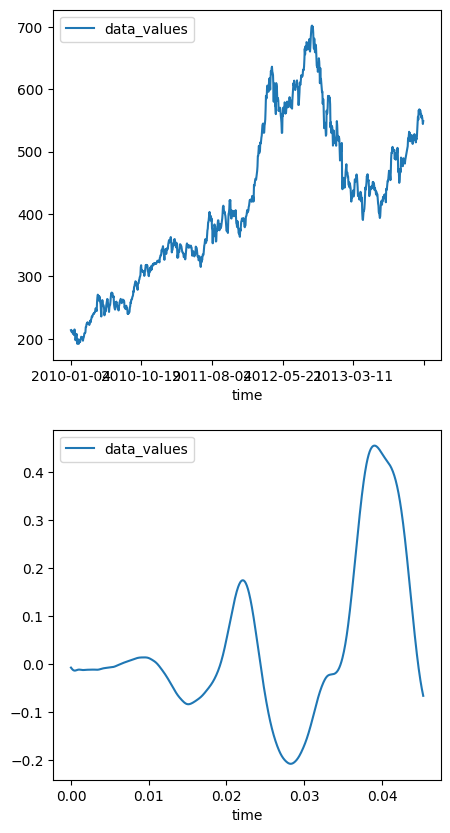

In [13]:
# plotting a time series (PART II)
# this time, with 'time' column
data1 = prices[prices['symbol']=='AAPL'][['date', 'close']].reset_index()
data1 = data1.drop('index', axis=1)
data1.columns=['time', 'data_values']

data_values = [-0.006969843525439501, -0.007952902466058731, -0.008903459645807743, -0.009798352606594563, -0.010616515763103962, -0.011340003460645676, -0.011954753659665585, -0.012451224029064178, -0.01282479427754879, -0.013075812719762325, -0.013209492899477482, -0.013235514983534813, -0.013167372904717922, -0.013021581806242466, -0.012816701084375381, -0.012572313658893108, -0.012307990342378616, -0.012042277492582798, -0.011791798286139965, -0.011570518836379051, -0.01138916052877903, -0.011254891753196716, -0.011171218939125538, -0.011138049885630608, -0.011152053251862526, -0.011207137256860733, -0.011295061558485031, -0.011406184174120426, -0.0115301962941885, -0.011656871065497398, -0.011776749975979328, -0.011881713755428791, -0.011965455487370491, -0.012023726478219032, -0.012054483406245708, -0.012057826854288578, -0.012035825289785862, -0.011992150917649269, -0.011931713670492172, -0.011860133148729801, -0.011783263646066189, -0.011706703342497349, -0.011635394766926765, -0.0115732466802001, -0.01152291614562273, -0.011485704220831394, -0.011461532674729824, -0.011449089273810387, -0.011446037329733372, -0.011449296958744526, -0.011455396190285683, -0.011460858397185802, -0.011462492868304253, -0.011457755230367184, -0.011444938369095325, -0.011423380114138126, -0.011393466964364052, -0.01135662104934454, -0.011315174400806427, -0.011272117495536804, -0.011230852454900742, -0.011194849386811256, -0.011167343705892563, -0.011150991544127464, -0.01114762481302023, -0.011158009991049767, -0.011181741021573544, -0.011217181570827961, -0.011261539533734322, -0.011310956440865993, -0.011360818520188332, -0.011405935510993004, -0.011440948583185673, -0.011460607871413231, -0.011460174806416035, -0.01143566519021988, -0.011384151875972748, -0.011303910054266453, -0.01119453739374876, -0.011056967079639435, -0.01089339517056942, -0.010707118548452854, -0.010502327233552933, -0.010283825919032097, -0.010056761093437672, -0.00982631091028452, -0.009597375988960266, -0.009374359622597694, -0.009160934016108513, -0.008959902450442314, -0.00877312757074833, -0.008601504378020763, -0.008445044979453087, -0.0083029605448246, -0.008173861540853977, -0.00805590022355318, -0.007947034202516079, -0.007845147512853146, -0.007748290430754423, -0.007654791697859764, -0.007563380058854818, -0.007473208010196686, -0.007383852265775204, -0.00729528209194541, -0.007207769900560379, -0.007121773436665535, -0.007037781178951263, -0.006956190336495638, -0.0068771555088460445, -0.006800487171858549, -0.006725572515279055, -0.006651308387517929, -0.006576104089617729, -0.0064979433082044125, -0.006414448376744986, -0.006323016714304686, -0.006220942363142967, -0.006105579435825348, -0.005974496249109507, -0.005825623869895935, -0.005657388363033533, -0.005468782503157854, -0.005259419791400433, -0.005029582884162664, -0.004780169110745192, -0.004512649495154619, -0.004228961654007435, -0.003931396175175905, -0.0036224524956196547, -0.0033047122415155172, -0.0029807088430970907, -0.002652780618518591, -0.002322975778952241, -0.001993001438677311, -0.001664179959334433, -0.001337438472546637, -0.001013335888274014, -0.0006921053281985223, -0.0003737312799785286, -5.8022378652822226e-05, 0.0002552849764470011, 0.000566476141102612, 0.0008757892064750195, 0.001183335785754025, 0.0014890804886817932, 0.001792827737517655, 0.002094237133860588, 0.0023928529117256403, 0.0026881499215960503, 0.002979591256007552, 0.003266678424552083, 0.003549037268385291, 0.0038264680188149214, 0.004098967649042606, 0.004366748966276646, 0.004630249459296465, 0.00489012198522687, 0.005147179588675499, 0.005402369890362024, 0.005656684283167124, 0.0059111095033586025, 0.006166553590446711, 0.006423812359571457, 0.0066834911704063416, 0.006945970002561808, 0.007211401127278805, 0.007479694671928883, 0.007750542834401131, 0.008023466914892197, 0.008297836408019066, 0.008572916500270367, 0.008847975172102451, 0.009122285060584545, 0.009395158849656582, 0.009666016325354576, 0.009934359230101109, 0.010199790820479393, 0.010461990721523762, 0.010720670223236084, 0.010975554585456848, 0.011226308532059193, 0.01147251483052969, 0.011713636107742786, 0.011948961764574051, 0.012177614495158195, 0.012398538179695606, 0.012610545381903648, 0.01281234435737133, 0.013002607971429825, 0.013180055655539036, 0.01334353443235159, 0.013492103666067123, 0.013625119812786579, 0.01374230906367302, 0.013843807391822338, 0.013930161483585835, 0.014002339914441109, 0.014061697758734226, 0.014109878800809383, 0.014148742891848087, 0.014180217869579792, 0.014206183142960072, 0.014228325337171555, 0.01424799207597971, 0.014266063459217548, 0.014282852411270142, 0.014298034831881523, 0.014310626313090324, 0.014318974688649178, 0.014320817776024342, 0.01431338395923376, 0.014293509535491467, 0.01425783522427082, 0.014202912338078022, 0.0141254598274827, 0.014022517018020153, 0.013891603797674179, 0.01373087614774704, 0.013539212755858898, 0.013316301628947258, 0.01306260097771883, 0.012779347598552704, 0.01246845442801714, 0.012132375501096249, 0.011773919686675072, 0.011396101675927639, 0.01100190356373787, 0.010594101622700691, 0.01017504371702671, 0.009746525436639786, 0.009309633634984493, 0.008864672854542732, 0.008411169983446598, 0.007947842590510845, 0.007472694385796785, 0.0069831437431275845, 0.0064761703833937645, 0.005948488134890795, 0.005396760534495115, 0.004817801062017679, 0.004208757542073727, 0.0035672998055815697, 0.0028917482122778893, 0.0021811758633702993, 0.0014354658778756857, 0.0006553070270456374, -0.00015784215065650642, -0.0010018463945016265, -0.0018740162486210465, -0.0027712644077837467, -0.003690282814204693, -0.0046277130022645, -0.0055803293362259865, -0.0065451995469629765, -0.007519813254475594, -0.008502190001308918, -0.009490938857197762, -0.010485285893082619, -0.011485062539577484, -0.012490631081163883, -0.013502828776836395, -0.014522832818329334, -0.015552057884633541, -0.0165919940918684, -0.017644120380282402, -0.018709750846028328, -0.019789952784776688, -0.020885499194264412, -0.021996784955263138, -0.02312386780977249, -0.02426641806960106, -0.025423860177397728, -0.026595309376716614, -0.02777978964149952, -0.028976233676075935, -0.030183574184775352, -0.03140084818005562, -0.032627228647470474, -0.033862072974443436, -0.03510497882962227, -0.03635562211275101, -0.03761390969157219, -0.03887977451086044, -0.04015316814184189, -0.041433919221162796, -0.0427217036485672, -0.044015832245349884, -0.04531529173254967, -0.04661860689520836, -0.047923874109983444, -0.04922868311405182, -0.05053018033504486, -0.051825109869241714, -0.0531100369989872, -0.05438120290637016, -0.05563488230109215, -0.056867506355047226, -0.05807573348283768, -0.05925658717751503, -0.060407742857933044, -0.06152743473649025, -0.06261463463306427, -0.06366916000843048, -0.06469137221574783, -0.06568249315023422, -0.06664425879716873, -0.06757901608943939, -0.0684892013669014, -0.06937756389379501, -0.07024683803319931, -0.07109934091567993, -0.0719371810555458, -0.07276184856891632, -0.07357412576675415, -0.07437396049499512, -0.07516057044267654, -0.0759323462843895, -0.07668673247098923, -0.07742071151733398, -0.07813037931919098, -0.07881157100200653, -0.0794597715139389, -0.08007032424211502, -0.08063872903585434, -0.08116075396537781, -0.08163250237703323, -0.08205077797174454, -0.08241289854049683, -0.08271712809801102, -0.08296241611242294, -0.08314850181341171, -0.08327591419219971, -0.08334612846374512, -0.08336102962493896, -0.08332307636737823, -0.08323535323143005, -0.08310102671384811, -0.08292367309331894, -0.08270672708749771, -0.08245393633842468, -0.08216861635446548, -0.0818541944026947, -0.08151374012231827, -0.08115013688802719, -0.08076605945825577, -0.08036381006240845, -0.0799456536769867, -0.07951334863901138, -0.07906867563724518, -0.07861322164535522, -0.07814817130565643, -0.07767457515001297, -0.07719365507364273, -0.07670603692531586, -0.0762123242020607, -0.07571301609277725, -0.0752081573009491, -0.07469765841960907, -0.07418119162321091, -0.07365802675485611, -0.07312728464603424, -0.0725877434015274, -0.07203804701566696, -0.07147658616304398, -0.07090158760547638, -0.07031130790710449, -0.06970391422510147, -0.06907770037651062, -0.06843104213476181, -0.06776271015405655, -0.0670715719461441, -0.0663570687174797, -0.06561893224716187, -0.06485734134912491, -0.06407298892736435, -0.06326692551374435, -0.06244063004851341, -0.06159583851695061, -0.06073455512523651, -0.05985897779464722, -0.05897130072116852, -0.05807364732027054, -0.05716809630393982, -0.05625639855861664, -0.05533996596932411, -0.05441979691386223, -0.053496409207582474, -0.05256979912519455, -0.051639385521411896, -0.05070418864488602, -0.04976261407136917, -0.04881269857287407, -0.047852154821157455, -0.04687836393713951, -0.04588853940367699, -0.044879794120788574, -0.043849244713783264, -0.04279410094022751, -0.041711702942848206, -0.04059965908527374, -0.03945586457848549, -0.03827839717268944, -0.03706580400466919, -0.03581683337688446, -0.034530527889728546, -0.03320617228746414, -0.03184308111667633, -0.030440744012594223, -0.028998618945479393, -0.02751609869301319, -0.02599235624074936, -0.024426385760307312, -0.022816931828856468, -0.021162424236536026, -0.019460922107100487, -0.01771015301346779, -0.01590757817029953, -0.014050310477614403, -0.01213528960943222, -0.010159285739064217, -0.008118986152112484, -0.006011120043694973, -0.0038326045032590628, -0.0015805383445695043, 0.000747643003705889, 0.0031540850177407265, 0.0056404476054012775, 0.008207831531763077, 0.010856736451387405, 0.013587037101387978, 0.016397980973124504, 0.019288184121251106, 0.02225562371313572, 0.02529769577085972, 0.028411362320184708, 0.031593065708875656, 0.03483891487121582, 0.03814474120736122, 0.04150610789656639, 0.044918518513441086, 0.04837728664278984, 0.05187787115573883, 0.05541561543941498, 0.058985963463783264, 0.06258455663919449, 0.06620699912309647, 0.06984919309616089, 0.07350697368383408, 0.07717640697956085, 0.08085354417562485, 0.08453439921140671, 0.08821514248847961, 0.09189169108867645, 0.09555979818105698, 0.09921526163816452, 0.10285355150699615, 0.10646987706422806, 0.11005926132202148, 0.1136162206530571, 0.11713528633117676, 0.12061043083667755, 0.12403544783592224, 0.1274038553237915, 0.1307087391614914, 0.1339433342218399, 0.13710051774978638, 0.1401730626821518, 0.1431540697813034, 0.14603619277477264, 0.1488126814365387, 0.15147684514522552, 0.15402238070964813, 0.15644314885139465, 0.15873372554779053, 0.1608888804912567, 0.16290384531021118, 0.16477492451667786, 0.16649803519248962, 0.16807040572166443, 0.1694892942905426, 0.1707523763179779, 0.17185774445533752, 0.17280395328998566, 0.17358961701393127, 0.17421336472034454, 0.17467424273490906, 0.1749710738658905, 0.1751028448343277, 0.1750684380531311, 0.17486673593521118, 0.1744963824748993, 0.17395634949207306, 0.17324523627758026, 0.17236198484897614, 0.17130543291568756, 0.17007480561733246, 0.1686692237854004, 0.16708862781524658, 0.16533292829990387, 0.16340264678001404, 0.1612987518310547, 0.15902268886566162, 0.15657630562782288, 0.15396235883235931, 0.15118364989757538, 0.1482437252998352, 0.14514636993408203, 0.14189566671848297, 0.13849623501300812, 0.13495275378227234, 0.13127009570598602, 0.12745319306850433, 0.12350741028785706, 0.11943776905536652, 0.11524970829486847, 0.1109485775232315, 0.10653993487358093, 0.10202929377555847, 0.09742264449596405, 0.0927259624004364, 0.08794556558132172, 0.08308792114257812, 0.07816005498170853, 0.07316907495260239, 0.06812231242656708, 0.06302756071090698, 0.05789267644286156, 0.052725620567798615, 0.04753440245985985, 0.042326997965574265, 0.03711116313934326, 0.03189440816640854, 0.02668387070298195, 0.02148626558482647, 0.016307726502418518, 0.011153830215334892, 0.006029551383107901, 0.0009392463252879679, -0.004113342612981796, -0.00912502035498619, -0.014093099161982536, -0.019015314057469368, -0.023889727890491486, -0.028714654967188835, -0.03348856046795845, -0.038209978491067886, -0.042877454310655594, -0.047489456832408905, -0.052044373005628586, -0.056540410965681076, -0.06097571924328804, -0.06534827500581741, -0.06965593993663788, -0.0738966166973114, -0.07806801050901413, -0.08216818422079086, -0.08619511127471924, -0.09014693647623062, -0.09402209520339966, -0.0978192687034607, -0.10153736174106598, -0.1051756739616394, -0.10873371362686157, -0.11221137642860413, -0.11560867726802826, -0.11892612278461456, -0.12216430902481079, -0.1253240406513214, -0.12840652465820312, -0.13141269981861115, -0.134344220161438, -0.13720236718654633, -0.1399887204170227, -0.1427050232887268, -0.1453530341386795, -0.1479344367980957, -0.15045106410980225, -0.15290477871894836, -0.1552973836660385, -0.1576305329799652, -0.15990592539310455, -0.16212491691112518, -0.164288729429245, -0.16639845073223114, -0.16845472157001495, -0.1704578548669815, -0.17240801453590393, -0.1743048131465912, -0.17614780366420746, -0.17793604731559753, -0.17966866493225098, -0.18134449422359467, -0.18296247720718384, -0.18452133238315582, -0.18602026998996735, -0.18745875358581543, -0.18883638083934784, -0.1901533156633377, -0.19141043722629547, -0.1926087886095047, -0.1937500387430191, -0.19483642280101776, -0.19587016105651855, -0.19685405492782593, -0.1977909356355667, -0.19868355989456177, -0.19953449070453644, -0.2003459632396698, -0.20111988484859467, -0.201857328414917, -0.202558696269989, -0.2032240927219391, -0.20385216176509857, -0.2044413983821869, -0.20498934388160706, -0.20549322664737701, -0.2059497982263565, -0.20635555684566498, -0.20670723915100098, -0.20700129866600037, -0.20723502337932587, -0.2074059396982193, -0.20751219987869263, -0.20755255222320557, -0.20752672851085663, -0.20743504166603088, -0.2072785198688507, -0.20705869793891907, -0.20677778124809265, -0.20643815398216248, -0.20604240894317627, -0.20559312403202057, -0.20509257912635803, -0.20454297959804535, -0.2039456069469452, -0.20330190658569336, -0.20261240005493164, -0.2018771767616272, -0.201095849275589, -0.20026767253875732, -0.19939182698726654, -0.19846712052822113, -0.1974923312664032, -0.19646690785884857, -0.19538986682891846, -0.19426117837429047, -0.1930811107158661, -0.19185037910938263, -0.19057025015354156, -0.1892424374818802, -0.18786895275115967, -0.18645215034484863, -0.18499422073364258, -0.1834973841905594, -0.18196389079093933, -0.18039512634277344, -0.17879250645637512, -0.17715641856193542, -0.17548708617687225, -0.17378370463848114, -0.17204499244689941, -0.17026935517787933, -0.16845472157001495, -0.16659824550151825, -0.16469769179821014, -0.1627504676580429, -0.16075442731380463, -0.15870755910873413, -0.1566086709499359, -0.15445682406425476, -0.15225185453891754, -0.14999431371688843, -0.14768515527248383, -0.1453259140253067, -0.1429188847541809, -0.14046619832515717, -0.1379704475402832, -0.1354343593120575, -0.13286051154136658, -0.13025127351284027, -0.12760937213897705, -0.12493647634983063, -0.12223482877016068, -0.11950605362653732, -0.11675196141004562, -0.1139741986989975, -0.11117482930421829, -0.10835609585046768, -0.10552054643630981, -0.10267144441604614, -0.0998125821352005, -0.09694837033748627, -0.094083771109581, -0.09122445434331894, -0.08837645500898361, -0.08554624021053314, -0.08274051547050476, -0.07996580749750137, -0.0772286206483841, -0.07453489303588867, -0.07189017534255981, -0.06929906457662582, -0.06676535308361053, -0.06429200619459152, -0.06188094988465309, -0.059533290565013885, -0.05724930018186569, -0.055028654634952545, -0.052870530635118484, -0.050773926079273224, -0.048737846314907074, -0.04676143079996109, -0.04484422877430916, -0.04298641160130501, -0.041188795119524, -0.03945304825901985, -0.03778156638145447, -0.036177415400743484, -0.03464436158537865, -0.03318655118346214, -0.031808339059352875, -0.030514108017086983, -0.029307860881090164, -0.02819303795695305, -0.027172328904271126, -0.026247290894389153, -0.0254183541983366, -0.024684539064764977, -0.024043472483754158, -0.02349139004945755, -0.02302313968539238, -0.022632364183664322, -0.022311540320515633, -0.022052329033613205, -0.02184569649398327, -0.021682213991880417, -0.02155221626162529, -0.021446112543344498, -0.021354496479034424, -0.02126832865178585, -0.021179040893912315, -0.021078629419207573, -0.020959557965397835, -0.02081487514078617, -0.02063809521496296, -0.020423119887709618, -0.020164109766483307, -0.019855443388223648, -0.01949159801006317, -0.01906699128448963, -0.01857605203986168, -0.01801304519176483, -0.017372144386172295, -0.016647422686219215, -0.01583292707800865, -0.014922693371772766, -0.013910908252000809, -0.012791940942406654, -0.011560442857444286, -0.010211430490016937, -0.008740379475057125, -0.0071431854739785194, -0.00541623355820775, -0.003556350013241172, -0.0015607619425281882, 0.0005729723488911986, 0.0028470722027122974, 0.005263622850179672, 0.007824704982340336, 0.010532482527196407, 0.013389293104410172, 0.01639772765338421, 0.019560635089874268, 0.022881165146827698, 0.026362694799900055, 0.03000873513519764, 0.03382287174463272, 0.03780856356024742, 0.04196910187602043, 0.04630722105503082, 0.050825104117393494, 0.055524226278066635, 0.06040498986840248, 0.06546693295240402, 0.07070833444595337, 0.07612625509500504, 0.08171677589416504, 0.08747473359107971, 0.09339392185211182, 0.0994672179222107, 0.10568686574697495, 0.11204437166452408, 0.11853088438510895, 0.12513737380504608, 0.1318545788526535, 0.1386738419532776, 0.14558611810207367, 0.15258300304412842, 0.15965642035007477, 0.16679872572422028, 0.17400258779525757, 0.1812608689069748, 0.18856705725193024, 0.19591432809829712, 0.20329596102237701, 0.21070554852485657, 0.21813605725765228, 0.22558028995990753, 0.23303081095218658, 0.24047979712486267, 0.24791871011257172, 0.2553390860557556, 0.262731671333313, 0.2700870931148529, 0.2773955166339874, 0.28464776277542114, 0.29183313250541687, 0.29894259572029114, 0.30596640706062317, 0.31289535760879517, 0.31972038745880127, 0.3264332115650177, 0.33302563428878784, 0.33949002623558044, 0.3458196222782135, 0.35200726985931396, 0.3580472469329834, 0.3639333248138428, 0.3696603775024414, 0.3752231299877167, 0.38061678409576416, 0.38583648204803467, 0.39087826013565063, 0.3957376778125763, 0.40041112899780273, 0.40489473938941956, 0.4091857671737671, 0.41328099370002747, 0.417178213596344, 0.4208754003047943, 0.424371600151062, 0.4276657700538635, 0.4307584762573242, 0.43365001678466797, 0.4363420605659485, 0.4388367235660553, 0.4411371946334839, 0.4432467520236969, 0.4451698362827301, 0.446911484003067, 0.44847652316093445, 0.4498709440231323, 0.4511011838912964, 0.45217254757881165, 0.45309215784072876, 0.45386603474617004, 0.45450088381767273, 0.4550025761127472, 0.4553772509098053, 0.45563092827796936, 0.45576876401901245, 0.4557967185974121, 0.45571935176849365, 0.45554184913635254, 0.4552687108516693, 0.4549042582511902, 0.45445308089256287, 0.4539192318916321, 0.4533071517944336, 0.45262131094932556, 0.45186594128608704, 0.4510456621646881, 0.450165331363678, 0.44922998547554016, 0.44824469089508057, 0.44721534848213196, 0.44614729285240173, 0.44504687190055847, 0.44391968846321106, 0.44277223944664, 0.4416104257106781, 0.4404403567314148, 0.43926742672920227, 0.43809789419174194, 0.43693509697914124, 0.43578463792800903, 0.4346493184566498, 0.4335324764251709, 0.4324353039264679, 0.4313589632511139, 0.4303033947944641, 0.4292677640914917, 0.4282492995262146, 0.4272455871105194, 0.426252543926239, 0.42526543140411377, 0.42427903413772583, 0.423287570476532, 0.4222845733165741, 0.4212639331817627, 0.42021888494491577, 0.41914212703704834, 0.4180282652378082, 0.41687023639678955, 0.4156619608402252, 0.414398193359375, 0.41307303309440613, 0.41168174147605896, 0.4102192223072052, 0.4086814820766449, 0.4070642292499542, 0.4053634703159332, 0.40357527136802673, 0.401696115732193, 0.39972206950187683, 0.3976496756076813, 0.39547523856163025, 0.3931947350502014, 0.3908046782016754, 0.38830119371414185, 0.3856804668903351, 0.3829386830329895, 0.38007211685180664, 0.37707751989364624, 0.37395116686820984, 0.3706900179386139, 0.36729133129119873, 0.3637523651123047, 0.3600708544254303, 0.3562448024749756, 0.352272629737854, 0.34815308451652527, 0.34388479590415955, 0.33946752548217773, 0.33490023016929626, 0.3301829695701599, 0.3253156244754791, 0.320298433303833, 0.3151317536830902, 0.3098165988922119, 0.3043536841869354, 0.2987445294857025, 0.2929907739162445, 0.28709477186203003, 0.2810593247413635, 0.2748875319957733, 0.268583208322525, 0.26215094327926636, 0.2555955946445465, 0.2489234209060669, 0.24214066565036774, 0.23525427281856537, 0.22827205061912537, 0.2212017923593521, 0.21405205130577087, 0.20683160424232483, 0.19954928755760193, 0.19221411645412445, 0.18483512103557587, 0.1774211823940277, 0.1699809581041336, 0.1625230312347412, 0.15505532920360565, 0.14758583903312683, 0.14012202620506287, 0.13267125189304352, 0.1252404898405075, 0.11783644556999207, 0.11046601831912994, 0.10313578695058823, 0.09585247188806534, 0.08862287551164627, 0.08145377784967422, 0.07435236126184464, 0.06732579320669174, 0.06038156896829605, 0.053527217358350754, 0.04677052050828934, 0.0401192381978035, 0.033581141382455826, 0.0271637961268425, 0.020874636247754097, 0.014720611274242401, 0.008708249777555466, 0.002843494527041912, -0.002868387382477522, -0.008422906510531902, -0.013816401362419128, -0.019046086817979813, -0.024110108613967896, -0.029007460922002792, -0.03373805433511734, -0.03830267861485481, -0.04270290955901146, -0.046940941363573074, -0.05101972445845604, -0.05494258552789688, -0.058713398873806, -0.062336359173059464, -0.06581586599349976]

time = [0.0, 4.5351473922902495e-05, 9.070294784580499e-05, 0.00013605442176870748, 0.00018140589569160998, 0.00022675736961451248, 0.00027210884353741496, 0.00031746031746031746, 0.00036281179138321996, 0.00040816326530612246, 0.00045351473922902497, 0.0004988662131519275, 0.0005442176870748299, 0.0005895691609977325, 0.0006349206349206349, 0.0006802721088435374, 0.0007256235827664399, 0.0007709750566893424, 0.0008163265306122449, 0.0008616780045351474, 0.0009070294784580499, 0.0009523809523809524, 0.000997732426303855, 0.0010430839002267573, 0.0010884353741496598, 0.0011337868480725624, 0.001179138321995465, 0.0012244897959183673, 0.0012698412698412698, 0.0013151927437641724, 0.0013605442176870747, 0.0014058956916099773, 0.0014512471655328798, 0.0014965986394557824, 0.0015419501133786847, 0.0015873015873015873, 0.0016326530612244899, 0.0016780045351473922, 0.0017233560090702948, 0.0017687074829931973, 0.0018140589569160999, 0.0018594104308390022, 0.0019047619047619048, 0.0019501133786848073, 0.00199546485260771, 0.0020408163265306124, 0.0020861678004535146, 0.002131519274376417, 0.0021768707482993197, 0.0022222222222222222, 0.0022675736961451248, 0.0023129251700680273, 0.00235827664399093, 0.002403628117913832, 0.0024489795918367346, 0.002494331065759637, 0.0025396825396825397, 0.0025850340136054422, 0.002630385487528345, 0.0026757369614512473, 0.0027210884353741495, 0.002766439909297052, 0.0028117913832199546, 0.002857142857142857, 0.0029024943310657597, 0.0029478458049886623, 0.002993197278911565, 0.003038548752834467, 0.0030839002267573695, 0.003129251700680272, 0.0031746031746031746, 0.003219954648526077, 0.0032653061224489797, 0.0033106575963718823, 0.0033560090702947844, 0.003401360544217687, 0.0034467120181405895, 0.003492063492063492, 0.0035374149659863946, 0.003582766439909297, 0.0036281179138321997, 0.003673469387755102, 0.0037188208616780044, 0.003764172335600907, 0.0038095238095238095, 0.003854875283446712, 0.0039002267573696146, 0.003945578231292517, 0.00399092970521542, 0.004036281179138322, 0.004081632653061225, 0.004126984126984127, 0.004172335600907029, 0.004217687074829932, 0.004263038548752834, 0.004308390022675737, 0.004353741496598639, 0.004399092970521542, 0.0044444444444444444, 0.004489795918367347, 0.0045351473922902496, 0.004580498866213152, 0.004625850340136055, 0.004671201814058957, 0.00471655328798186, 0.004761904761904762, 0.004807256235827664, 0.004852607709750567, 0.004897959183673469, 0.004943310657596372, 0.004988662131519274, 0.005034013605442177, 0.005079365079365079, 0.005124716553287982, 0.0051700680272108845, 0.005215419501133787, 0.00526077097505669, 0.005306122448979592, 0.005351473922902495, 0.005396825396825397, 0.005442176870748299, 0.0054875283446712015, 0.005532879818594104, 0.005578231292517007, 0.005623582766439909, 0.005668934240362812, 0.005714285714285714, 0.005759637188208617, 0.005804988662131519, 0.005850340136054422, 0.0058956916099773245, 0.005941043083900227, 0.00598639455782313, 0.006031746031746032, 0.006077097505668934, 0.006122448979591836, 0.006167800453514739, 0.0062131519274376415, 0.006258503401360544, 0.006303854875283447, 0.006349206349206349, 0.006394557823129252, 0.006439909297052154, 0.006485260770975057, 0.006530612244897959, 0.006575963718820862, 0.0066213151927437645, 0.006666666666666667, 0.006712018140589569, 0.006757369614512471, 0.006802721088435374, 0.0068480725623582765, 0.006893424036281179, 0.0069387755102040816, 0.006984126984126984, 0.007029478458049887, 0.007074829931972789, 0.007120181405895692, 0.007165532879818594, 0.007210884353741497, 0.0072562358276643995, 0.007301587301587302, 0.007346938775510204, 0.007392290249433106, 0.007437641723356009, 0.007482993197278911, 0.007528344671201814, 0.0075736961451247165, 0.007619047619047619, 0.007664399092970522, 0.007709750566893424, 0.007755102040816327, 0.007800453514739229, 0.007845804988662131, 0.007891156462585034, 0.007936507936507936, 0.00798185941043084, 0.008027210884353741, 0.008072562358276645, 0.008117913832199546, 0.00816326530612245, 0.008208616780045351, 0.008253968253968255, 0.008299319727891157, 0.008344671201814058, 0.008390022675736962, 0.008435374149659863, 0.008480725623582767, 0.008526077097505668, 0.008571428571428572, 0.008616780045351474, 0.008662131519274377, 0.008707482993197279, 0.008752834467120182, 0.008798185941043084, 0.008843537414965987, 0.008888888888888889, 0.00893424036281179, 0.008979591836734694, 0.009024943310657596, 0.009070294784580499, 0.0091156462585034, 0.009160997732426304, 0.009206349206349206, 0.00925170068027211, 0.009297052154195011, 0.009342403628117914, 0.009387755102040816, 0.00943310657596372, 0.009478458049886621, 0.009523809523809525, 0.009569160997732426, 0.009614512471655328, 0.009659863945578231, 0.009705215419501133, 0.009750566893424037, 0.009795918367346938, 0.009841269841269842, 0.009886621315192743, 0.009931972789115647, 0.009977324263038548, 0.010022675736961452, 0.010068027210884354, 0.010113378684807257, 0.010158730158730159, 0.01020408163265306, 0.010249433106575964, 0.010294784580498866, 0.010340136054421769, 0.01038548752834467, 0.010430839002267574, 0.010476190476190476, 0.01052154195011338, 0.01056689342403628, 0.010612244897959184, 0.010657596371882086, 0.01070294784580499, 0.010748299319727891, 0.010793650793650795, 0.010839002267573696, 0.010884353741496598, 0.010929705215419501, 0.010975056689342403, 0.011020408163265306, 0.011065759637188208, 0.011111111111111112, 0.011156462585034013, 0.011201814058956917, 0.011247165532879818, 0.011292517006802722, 0.011337868480725623, 0.011383219954648527, 0.011428571428571429, 0.01147392290249433, 0.011519274376417234, 0.011564625850340135, 0.011609977324263039, 0.01165532879818594, 0.011700680272108844, 0.011746031746031746, 0.011791383219954649, 0.01183673469387755, 0.011882086167800454, 0.011927437641723356, 0.01197278911564626, 0.012018140589569161, 0.012063492063492064, 0.012108843537414966, 0.012154195011337868, 0.012199546485260771, 0.012244897959183673, 0.012290249433106576, 0.012335600907029478, 0.012380952380952381, 0.012426303854875283, 0.012471655328798186, 0.012517006802721088, 0.012562358276643992, 0.012607709750566893, 0.012653061224489797, 0.012698412698412698, 0.0127437641723356, 0.012789115646258504, 0.012834467120181405, 0.012879818594104309, 0.01292517006802721, 0.012970521541950114, 0.013015873015873015, 0.013061224489795919, 0.01310657596371882, 0.013151927437641724, 0.013197278911564626, 0.013242630385487529, 0.01328798185941043, 0.013333333333333334, 0.013378684807256236, 0.013424036281179138, 0.013469387755102041, 0.013514739229024943, 0.013560090702947846, 0.013605442176870748, 0.013650793650793651, 0.013696145124716553, 0.013741496598639456, 0.013786848072562358, 0.013832199546485261, 0.013877551020408163, 0.013922902494331067, 0.013968253968253968, 0.01401360544217687, 0.014058956916099773, 0.014104308390022675, 0.014149659863945578, 0.01419501133786848, 0.014240362811791384, 0.014285714285714285, 0.014331065759637189, 0.01437641723356009, 0.014421768707482994, 0.014467120181405895, 0.014512471655328799, 0.0145578231292517, 0.014603174603174604, 0.014648526077097506, 0.014693877551020407, 0.01473922902494331, 0.014784580498866213, 0.014829931972789116, 0.014875283446712018, 0.014920634920634921, 0.014965986394557823, 0.015011337868480726, 0.015056689342403628, 0.015102040816326531, 0.015147392290249433, 0.015192743764172336, 0.015238095238095238, 0.01528344671201814, 0.015328798185941043, 0.015374149659863945, 0.015419501133786848, 0.01546485260770975, 0.015510204081632653, 0.015555555555555555, 0.015600907029478459, 0.015646258503401362, 0.015691609977324262, 0.015736961451247165, 0.01578231292517007, 0.015827664399092972, 0.015873015873015872, 0.015918367346938776, 0.01596371882086168, 0.01600907029478458, 0.016054421768707482, 0.016099773242630386, 0.01614512471655329, 0.01619047619047619, 0.016235827664399093, 0.016281179138321996, 0.0163265306122449, 0.0163718820861678, 0.016417233560090703, 0.016462585034013606, 0.01650793650793651, 0.01655328798185941, 0.016598639455782313, 0.016643990929705216, 0.016689342403628116, 0.01673469387755102, 0.016780045351473923, 0.016825396825396827, 0.016870748299319727, 0.01691609977324263, 0.016961451247165533, 0.017006802721088437, 0.017052154195011337, 0.01709750566893424, 0.017142857142857144, 0.017188208616780044, 0.017233560090702947, 0.01727891156462585, 0.017324263038548754, 0.017369614512471654, 0.017414965986394557, 0.01746031746031746, 0.017505668934240364, 0.017551020408163264, 0.017596371882086168, 0.01764172335600907, 0.017687074829931974, 0.017732426303854874, 0.017777777777777778, 0.01782312925170068, 0.01786848072562358, 0.017913832199546485, 0.017959183673469388, 0.01800453514739229, 0.01804988662131519, 0.018095238095238095, 0.018140589569160998, 0.0181859410430839, 0.0182312925170068, 0.018276643990929705, 0.01832199546485261, 0.018367346938775512, 0.018412698412698412, 0.018458049886621315, 0.01850340136054422, 0.01854875283446712, 0.018594104308390022, 0.018639455782312925, 0.01868480725623583, 0.01873015873015873, 0.018775510204081632, 0.018820861678004536, 0.01886621315192744, 0.01891156462585034, 0.018956916099773242, 0.019002267573696146, 0.01904761904761905, 0.01909297052154195, 0.019138321995464853, 0.019183673469387756, 0.019229024943310656, 0.01927437641723356, 0.019319727891156463, 0.019365079365079366, 0.019410430839002266, 0.01945578231292517, 0.019501133786848073, 0.019546485260770977, 0.019591836734693877, 0.01963718820861678, 0.019682539682539683, 0.019727891156462583, 0.019773242630385487, 0.01981859410430839, 0.019863945578231294, 0.019909297052154194, 0.019954648526077097, 0.02, 0.020045351473922904, 0.020090702947845804, 0.020136054421768707, 0.02018140589569161, 0.020226757369614514, 0.020272108843537414, 0.020317460317460317, 0.02036281179138322, 0.02040816326530612, 0.020453514739229024, 0.020498866213151928, 0.02054421768707483, 0.02058956916099773, 0.020634920634920634, 0.020680272108843538, 0.02072562358276644, 0.02077097505668934, 0.020816326530612245, 0.020861678004535148, 0.02090702947845805, 0.02095238095238095, 0.020997732426303855, 0.02104308390022676, 0.02108843537414966, 0.02113378684807256, 0.021179138321995465, 0.02122448979591837, 0.02126984126984127, 0.021315192743764172, 0.021360544217687075, 0.02140589569160998, 0.02145124716553288, 0.021496598639455782, 0.021541950113378686, 0.02158730158730159, 0.02163265306122449, 0.021678004535147392, 0.021723356009070296, 0.021768707482993196, 0.0218140589569161, 0.021859410430839003, 0.021904761904761906, 0.021950113378684806, 0.02199546485260771, 0.022040816326530613, 0.022086167800453516, 0.022131519274376416, 0.02217687074829932, 0.022222222222222223, 0.022267573696145123, 0.022312925170068026, 0.02235827664399093, 0.022403628117913833, 0.022448979591836733, 0.022494331065759637, 0.02253968253968254, 0.022585034013605444, 0.022630385487528343, 0.022675736961451247, 0.02272108843537415, 0.022766439909297054, 0.022811791383219954, 0.022857142857142857, 0.02290249433106576, 0.02294784580498866, 0.022993197278911564, 0.023038548752834467, 0.02308390022675737, 0.02312925170068027, 0.023174603174603174, 0.023219954648526078, 0.02326530612244898, 0.02331065759637188, 0.023356009070294784, 0.023401360544217688, 0.02344671201814059, 0.02349206349206349, 0.023537414965986395, 0.023582766439909298, 0.023628117913832198, 0.0236734693877551, 0.023718820861678005, 0.023764172335600908, 0.023809523809523808, 0.02385487528344671, 0.023900226757369615, 0.02394557823129252, 0.02399092970521542, 0.024036281179138322, 0.024081632653061225, 0.02412698412698413, 0.02417233560090703, 0.024217687074829932, 0.024263038548752835, 0.024308390022675735, 0.02435374149659864, 0.024399092970521542, 0.024444444444444446, 0.024489795918367346, 0.02453514739229025, 0.024580498866213153, 0.024625850340136056, 0.024671201814058956, 0.02471655328798186, 0.024761904761904763, 0.024807256235827663, 0.024852607709750566, 0.02489795918367347, 0.024943310657596373, 0.024988662131519273, 0.025034013605442176, 0.02507936507936508, 0.025124716553287983, 0.025170068027210883, 0.025215419501133787, 0.02526077097505669, 0.025306122448979593, 0.025351473922902493, 0.025396825396825397, 0.0254421768707483, 0.0254875283446712, 0.025532879818594104, 0.025578231292517007, 0.02562358276643991, 0.02566893424036281, 0.025714285714285714, 0.025759637188208617, 0.02580498866213152, 0.02585034013605442, 0.025895691609977324, 0.025941043083900227, 0.02598639455782313, 0.02603174603174603, 0.026077097505668934, 0.026122448979591838, 0.026167800453514738, 0.02621315192743764, 0.026258503401360545, 0.026303854875283448, 0.026349206349206348, 0.02639455782312925, 0.026439909297052155, 0.026485260770975058, 0.026530612244897958, 0.02657596371882086, 0.026621315192743765, 0.02666666666666667, 0.02671201814058957, 0.026757369614512472, 0.026802721088435375, 0.026848072562358275, 0.02689342403628118, 0.026938775510204082, 0.026984126984126985, 0.027029478458049885, 0.02707482993197279, 0.027120181405895692, 0.027165532879818596, 0.027210884353741496, 0.0272562358276644, 0.027301587301587302, 0.027346938775510202, 0.027392290249433106, 0.02743764172335601, 0.027482993197278913, 0.027528344671201813, 0.027573696145124716, 0.02761904761904762, 0.027664399092970523, 0.027709750566893423, 0.027755102040816326, 0.02780045351473923, 0.027845804988662133, 0.027891156462585033, 0.027936507936507936, 0.02798185941043084, 0.02802721088435374, 0.028072562358276643, 0.028117913832199547, 0.02816326530612245, 0.02820861678004535, 0.028253968253968254, 0.028299319727891157, 0.02834467120181406, 0.02839002267573696, 0.028435374149659864, 0.028480725623582767, 0.02852607709750567, 0.02857142857142857, 0.028616780045351474, 0.028662131519274377, 0.028707482993197277, 0.02875283446712018, 0.028798185941043084, 0.028843537414965988, 0.028888888888888888, 0.02893424036281179, 0.028979591836734694, 0.029024943310657598, 0.029070294784580498, 0.0291156462585034, 0.029160997732426305, 0.029206349206349208, 0.029251700680272108, 0.02929705215419501, 0.029342403628117915, 0.029387755102040815, 0.029433106575963718, 0.02947845804988662, 0.029523809523809525, 0.029569160997732425, 0.02961451247165533, 0.029659863945578232, 0.029705215419501135, 0.029750566893424035, 0.02979591836734694, 0.029841269841269842, 0.029886621315192742, 0.029931972789115645, 0.02997732426303855, 0.030022675736961452, 0.030068027210884352, 0.030113378684807256, 0.03015873015873016, 0.030204081632653063, 0.030249433106575963, 0.030294784580498866, 0.03034013605442177, 0.030385487528344673, 0.030430839002267573, 0.030476190476190476, 0.03052154195011338, 0.03056689342403628, 0.030612244897959183, 0.030657596371882086, 0.03070294784580499, 0.03074829931972789, 0.030793650793650793, 0.030839002267573697, 0.0308843537414966, 0.0309297052154195, 0.030975056689342403, 0.031020408163265307, 0.03106575963718821, 0.03111111111111111, 0.031156462585034014, 0.031201814058956917, 0.031247165532879817, 0.031292517006802724, 0.031337868480725624, 0.031383219954648524, 0.03142857142857143, 0.03147392290249433, 0.03151927437641723, 0.03156462585034014, 0.03160997732426304, 0.031655328798185944, 0.031700680272108844, 0.031746031746031744, 0.03179138321995465, 0.03183673469387755, 0.03188208616780045, 0.03192743764172336, 0.03197278911564626, 0.03201814058956916, 0.032063492063492065, 0.032108843537414965, 0.03215419501133787, 0.03219954648526077, 0.03224489795918367, 0.03229024943310658, 0.03233560090702948, 0.03238095238095238, 0.032426303854875285, 0.032471655328798185, 0.032517006802721085, 0.03256235827664399, 0.03260770975056689, 0.0326530612244898, 0.0326984126984127, 0.0327437641723356, 0.032789115646258506, 0.032834467120181406, 0.032879818594104306, 0.03292517006802721, 0.03297052154195011, 0.03301587301587302, 0.03306122448979592, 0.03310657596371882, 0.033151927437641726, 0.033197278911564626, 0.033242630385487526, 0.03328798185941043, 0.03333333333333333, 0.03337868480725623, 0.03342403628117914, 0.03346938775510204, 0.03351473922902495, 0.033560090702947847, 0.033605442176870746, 0.03365079365079365, 0.03369614512471655, 0.03374149659863945, 0.03378684807256236, 0.03383219954648526, 0.03387755102040816, 0.03392290249433107, 0.03396825396825397, 0.034013605442176874, 0.034058956916099774, 0.034104308390022674, 0.03414965986394558, 0.03419501133786848, 0.03424036281179138, 0.03428571428571429, 0.03433106575963719, 0.03437641723356009, 0.034421768707482994, 0.034467120181405894, 0.0345124716553288, 0.0345578231292517, 0.0346031746031746, 0.03464852607709751, 0.03469387755102041, 0.03473922902494331, 0.034784580498866215, 0.034829931972789115, 0.03487528344671202, 0.03492063492063492, 0.03496598639455782, 0.03501133786848073, 0.03505668934240363, 0.03510204081632653, 0.035147392290249435, 0.035192743764172335, 0.035238095238095235, 0.03528344671201814, 0.03532879818594104, 0.03537414965986395, 0.03541950113378685, 0.03546485260770975, 0.035510204081632656, 0.035555555555555556, 0.035600907029478455, 0.03564625850340136, 0.03569160997732426, 0.03573696145124716, 0.03578231292517007, 0.03582766439909297, 0.035873015873015876, 0.035918367346938776, 0.035963718820861676, 0.03600907029478458, 0.03605442176870748, 0.03609977324263038, 0.03614512471655329, 0.03619047619047619, 0.03623582766439909, 0.036281179138321996, 0.036326530612244896, 0.0363718820861678, 0.0364172335600907, 0.0364625850340136, 0.03650793650793651, 0.03655328798185941, 0.03659863945578231, 0.03664399092970522, 0.03668934240362812, 0.036734693877551024, 0.036780045351473924, 0.036825396825396824, 0.03687074829931973, 0.03691609977324263, 0.03696145124716553, 0.03700680272108844, 0.03705215419501134, 0.03709750566893424, 0.037142857142857144, 0.037188208616780044, 0.03723356009070295, 0.03727891156462585, 0.03732426303854875, 0.03736961451247166, 0.03741496598639456, 0.03746031746031746, 0.037505668934240365, 0.037551020408163265, 0.037596371882086164, 0.03764172335600907, 0.03768707482993197, 0.03773242630385488, 0.03777777777777778, 0.03782312925170068, 0.037868480725623585, 0.037913832199546485, 0.037959183673469385, 0.03800453514739229, 0.03804988662131519, 0.0380952380952381, 0.038140589569161, 0.0381859410430839, 0.038231292517006805, 0.038276643990929705, 0.038321995464852605, 0.03836734693877551, 0.03841269841269841, 0.03845804988662131, 0.03850340136054422, 0.03854875283446712, 0.038594104308390026, 0.038639455782312926, 0.038684807256235826, 0.03873015873015873, 0.03877551020408163, 0.03882086167800453, 0.03886621315192744, 0.03891156462585034, 0.03895691609977324, 0.039002267573696146, 0.039047619047619046, 0.03909297052154195, 0.03913832199546485, 0.03918367346938775, 0.03922902494331066, 0.03927437641723356, 0.03931972789115646, 0.03936507936507937, 0.03941043083900227, 0.03945578231292517, 0.039501133786848074, 0.039546485260770974, 0.03959183673469388, 0.03963718820861678, 0.03968253968253968, 0.03972789115646259, 0.03977324263038549, 0.03981859410430839, 0.039863945578231294, 0.039909297052154194, 0.0399546485260771, 0.04, 0.0400453514739229, 0.04009070294784581, 0.04013605442176871, 0.04018140589569161, 0.040226757369614514, 0.040272108843537414, 0.040317460317460314, 0.04036281179138322, 0.04040816326530612, 0.04045351473922903, 0.04049886621315193, 0.04054421768707483, 0.040589569160997735, 0.040634920634920635, 0.040680272108843535, 0.04072562358276644, 0.04077097505668934, 0.04081632653061224, 0.04086167800453515, 0.04090702947845805, 0.040952380952380955, 0.040997732426303855, 0.041043083900226755, 0.04108843537414966, 0.04113378684807256, 0.04117913832199546, 0.04122448979591837, 0.04126984126984127, 0.04131519274376417, 0.041360544217687076, 0.041405895691609976, 0.04145124716553288, 0.04149659863945578, 0.04154195011337868, 0.04158730158730159, 0.04163265306122449, 0.04167800453514739, 0.041723356009070296, 0.041768707482993196, 0.0418140589569161, 0.041859410430839, 0.0419047619047619, 0.04195011337868481, 0.04199546485260771, 0.04204081632653061, 0.04208616780045352, 0.04213151927437642, 0.04217687074829932, 0.042222222222222223, 0.04226757369614512, 0.04231292517006803, 0.04235827664399093, 0.04240362811791383, 0.04244897959183674, 0.04249433106575964, 0.04253968253968254, 0.042585034013605444, 0.042630385487528344, 0.042675736961451244, 0.04272108843537415, 0.04276643990929705, 0.04281179138321996, 0.04285714285714286, 0.04290249433106576, 0.042947845804988664, 0.042993197278911564, 0.043038548752834464, 0.04308390022675737, 0.04312925170068027, 0.04317460317460318, 0.04321995464852608, 0.04326530612244898, 0.043310657596371885, 0.043356009070294785, 0.043401360544217685, 0.04344671201814059, 0.04349206349206349, 0.04353741496598639, 0.0435827664399093, 0.0436281179138322, 0.043673469387755105, 0.043718820861678005, 0.043764172335600905, 0.04380952380952381, 0.04385487528344671, 0.04390022675736961, 0.04394557823129252, 0.04399092970521542, 0.04403628117913832, 0.044081632653061226, 0.044126984126984126, 0.04417233560090703, 0.04421768707482993, 0.04426303854875283, 0.04430839002267574, 0.04435374149659864, 0.04439909297052154, 0.044444444444444446, 0.044489795918367346, 0.044535147392290246, 0.04458049886621315, 0.04462585034013605, 0.04467120181405896, 0.04471655328798186, 0.04476190476190476, 0.04480725623582767, 0.04485260770975057, 0.044897959183673466, 0.04494331065759637, 0.04498866213151927, 0.04503401360544218, 0.04507936507936508, 0.04512471655328798, 0.04517006802721089, 0.04521541950113379, 0.04526077097505669, 0.045306122448979594]

data2 = pd.DataFrame({'time': time,'data_values':data_values})

# plot the time series
fig, axs = plt.subplots(2, 1, figsize=(5, 10))
data1.iloc[:1000].plot(x="time", y="data_values", ax=axs[0])
data2.iloc[:1000].plot(x="time", y="data_values", ax=axs[1])
plt.show()


#### 1.2 Machine Learning Basics

* Make sure to check your data before modeling
* 'sklearn' is the most popular library for machine learning
* Make sure to prepare data for modeling
* Finally, fit a model and validate its performance

E:\PYTHON\Lib\site-packages\sklearn\svm\_base.py:1225: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(
No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


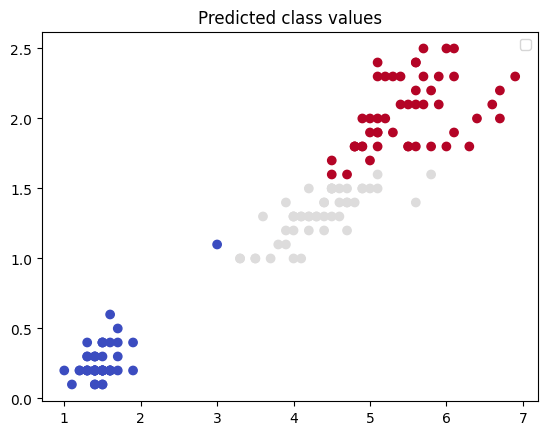

In [9]:
# fitting a simple model: classification
from sklearn import datasets
import pandas as pd
from sklearn.svm import LinearSVC
import matplotlib.pyplot as plt

# get data: iris
iris = datasets.load_iris()
data = pd.DataFrame(iris.data, columns=iris.feature_names)
data['target'] = iris.target

# split data
X = data[['petal length (cm)', 'petal width (cm)']]
y = data['target']

# fit model
model = LinearSVC()
model.fit(X, y)

# predicting
predictions = model.predict(X)

# visualize predictions and actual values
plt.scatter(X['petal length (cm)'], X['petal width (cm)'], c = predictions, cmap=plt.cm.coolwarm)
plt.title("Predicted class values")
plt.legend()
plt.show()



In [17]:
# fitting a simple model: regression
from sklearn import datasets
import pandas as pd
from sklearn import linear_model
import matplotlib.pyplot as plt

# get dataset: housing
housing_ = datasets.fetch_california_housing(as_frame=True)
housing = housing_.data
housing['MedHouseVal'] = housing_.target
print(housing.head())
print(housing.shape)

# split data
X = housing['MedHouseVal']
y = housing['AveRooms']

# fit a model
model = linear_model.LinearRegression()
model.fit(X, y)

# predicting



   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  MedHouseVal  
0    -122.23        4.526  
1    -122.22        3.585  
2    -122.24        3.521  
3    -122.25        3.413  
4    -122.25        3.422  
(20640, 9)
